In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [0]:
# Если предсказывать с помощью линейной регрессии, то могут появляться такие числа:
-1, -0.2, 1.3, 0.05 ...

In [0]:
p [0, 1]

In [0]:
p / (1-p)

In [0]:
0.5 / (1-0.5)

1.0

In [0]:
0.01 / (1 - 0.01)

0.010101010101010102

In [0]:
0.9999 / (1-0.9999)

9999.0000000011

In [0]:
p = 1-1e-10
np.log(p / (1 - p))                       

23.025850847100088

In [0]:
p = 0.8
np.log(p / (1 - p))

1.3862943611198908

In [0]:
np.log(p / (1 - p)) # (-inf, +inf)

In [0]:
W*X = np.log(p / (1 - p))

In [0]:
z = W*X

In [0]:
z = np.log(p / (1 - p))

In [0]:
t = p / (1 - p) => t*(1-p) = p => t - t*p = p => t = p + t*p => t/p = 1 + t => p = t / (1 + t)

In [0]:
p = t / (1 + t)

In [0]:
z = np.log(t) => t = e**z => e**(W*X)

In [0]:
p = t / (1 + t) => p = e**z / (1 + e**z) => p = 1 / (1/e**z + 1) => p = 1 / (1 + e**(-z)) => p = 1/(1 + e**(-W*X))

In [0]:
p = 1/(1 + e**(-W*X))

In [0]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [0]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [0]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [0]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [0]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [0]:
def calc_logloss(y, y_pred):
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
  return err

In [5]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [0]:
def sigmoid(z):
  res = 1 / (1 + np.exp(-z))
  return res

In [7]:
z = np.linspace(-10, 10, 101)
z

array([-10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,  -8.4,
        -8.2,  -8. ,  -7.8,  -7.6,  -7.4,  -7.2,  -7. ,  -6.8,  -6.6,
        -6.4,  -6.2,  -6. ,  -5.8,  -5.6,  -5.4,  -5.2,  -5. ,  -4.8,
        -4.6,  -4.4,  -4.2,  -4. ,  -3.8,  -3.6,  -3.4,  -3.2,  -3. ,
        -2.8,  -2.6,  -2.4,  -2.2,  -2. ,  -1.8,  -1.6,  -1.4,  -1.2,
        -1. ,  -0.8,  -0.6,  -0.4,  -0.2,   0. ,   0.2,   0.4,   0.6,
         0.8,   1. ,   1.2,   1.4,   1.6,   1.8,   2. ,   2.2,   2.4,
         2.6,   2.8,   3. ,   3.2,   3.4,   3.6,   3.8,   4. ,   4.2,
         4.4,   4.6,   4.8,   5. ,   5.2,   5.4,   5.6,   5.8,   6. ,
         6.2,   6.4,   6.6,   6.8,   7. ,   7.2,   7.4,   7.6,   7.8,
         8. ,   8.2,   8.4,   8.6,   8.8,   9. ,   9.2,   9.4,   9.6,
         9.8,  10. ])

In [0]:
probabilities = sigmoid(z)

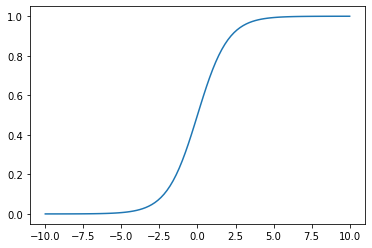

In [0]:
plt.plot(z, probabilities)

In [0]:
### Logistic Regression

In [0]:
def eval_model(X, y, iterations, alpha=1e-4):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [0]:
W = eval_model(X_st, y, iterations=1000, alpha=1e-4)

100 [ 0.49282748 -0.15007528  0.64748973  1.51727915] 1.2014814214705334
200 [ 0.48896219 -0.16184918  0.64728128  1.51155738] 1.1828456288538924
300 [ 0.48511874 -0.17358386  0.64706349  1.50586552] 1.1643525542846556
400 [ 0.4812976  -0.18527698  0.64683669  1.50020462] 1.1460086359433084
500 [ 0.47749927 -0.19692597  0.64660127  1.4945758 ] 1.127820879406358
600 [ 0.47372426 -0.20852799  0.6463577   1.48898028] 1.109796908143704
700 [ 0.46997312 -0.22007992  0.6461065   1.48341934] 1.0919450148769096
800 [ 0.46624642 -0.23157833  0.64584825  1.47789438] 1.074274212586137
900 [ 0.46254476 -0.24301946  0.64558365  1.4724069 ] 1.0567942835649755
1000 [ 0.45886878 -0.25439917  0.64531344  1.46695851] 1.0395158244739489


In [0]:
from sklearn.linear_model import LogisticRegression as LR

In [0]:
LR?